In [ ]:
!pip install sktime
!pip install pmdarima

In [ ]:
from pmdarima import auto_arima
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

In [ ]:
from google.colab import drive
drive.mount("Drive")

Mounted at Drive


In [ ]:
data = pd.read_csv("/content/Drive/MyDrive/ColabNotebooks/projects/Python/Copy of filled zero with before speed with POS.csv")
print(data.shape)
data.head()

(52116, 327)


,400001,400017,400030,400040,400045,400052,400057,400059,400065,400069,...,409528,409529,413026,413845,413877,413878,414284,414694,Day,Week
0,71.4,67.8,70.5,67.4,68.8,66.6,66.8,68.0,66.8,69.0,...,68.8,68.0,69.2,68.9,70.4,68.8,71.1,68.0,0,1
1,71.6,67.5,70.6,67.5,68.7,66.6,66.8,67.8,66.5,68.2,...,68.4,67.6,70.4,68.8,70.1,68.4,70.8,67.4,1,1
2,71.6,67.6,70.2,67.4,68.7,66.1,66.8,67.8,66.2,67.8,...,68.4,67.5,70.2,68.3,69.8,68.4,70.5,67.9,2,1
3,71.1,67.5,70.3,68.0,68.5,66.7,66.6,67.7,65.9,67.8,...,68.5,67.5,70.4,68.7,70.2,68.4,70.8,67.6,3,1
4,71.7,67.8,70.2,68.1,68.4,66.9,66.1,67.7,66.1,67.8,...,68.5,67.4,69.6,69.1,70.0,68.4,71.0,67.9,4,1


### Prediction for first station

In [ ]:
train_data = data.iloc[:-8640, 0]
test_data = data.iloc[-8640:, 0]

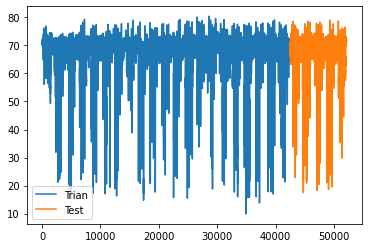

In [ ]:
train, = plt.plot(train_data)
test, = plt.plot(test_data)
plt.legend([train, test], ['Trian', 'Test'])

In [ ]:
model = auto_arima(train_data, seasonal=True,
                      start_p=2, start_q=2, max_order=7, 
                      test='adf',error_action='ignore',  
                      suppress_warnings=True,
                      stepwise=True, trace=True)

preds = model.predict(len(test_data))
print(f"MAE: {mean_absolute_error(test_data.values, preds)}")

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=157114.213, Time=25.52 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=306139.608, Time=1.10 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=160552.256, Time=2.89 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=254881.368, Time=8.77 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=490390.434, Time=0.47 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=157192.383, Time=24.04 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=157117.677, Time=15.74 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=157115.410, Time=32.46 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=157112.562, Time=50.29 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=157119.944, Time=29.56 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=157097.256, Time=81.04 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=157098.282, Time=77.13 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=157093.579, Time=44.39 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=157117.384, Time=21.55

In [ ]:
preds = model.predict(len(test_data))
mean_absolute_error(test_data.values, preds)

4.716681755283971

### Predict for second station

In [ ]:
train = data.iloc[:-8640, 1]
test_data = data.iloc[-8640:, 1]

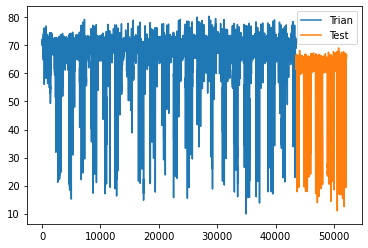

In [ ]:
train, = plt.plot(train_data)
test, = plt.plot(test_data)
plt.legend([train, test], ['Trian', 'Test'])

In [ ]:
model = auto_arima(train_data, seasonal=True,
                      start_p=2, start_q=2, max_order=7, 
                      test='adf',error_action='ignore',  
                      suppress_warnings=True,
                      stepwise=True, trace=True)

preds = model.predict(len(test_data))
print(f"MAE: {mean_absolute_error(test_data.values, preds)}")

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=157114.213, Time=24.98 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=306139.608, Time=1.08 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=160552.256, Time=2.44 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=254881.368, Time=8.71 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=490390.434, Time=0.45 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=157192.383, Time=23.15 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=157117.677, Time=15.49 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=157115.410, Time=32.01 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=157112.562, Time=50.20 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=157119.944, Time=26.70 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=157097.256, Time=82.23 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=157098.282, Time=76.89 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=157093.579, Time=44.25 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=157117.384, Time=19.40

### Predict for third station

In [ ]:
train_data = data.iloc[:-8640, 2]
test_data = data.iloc[-8640:, 2]

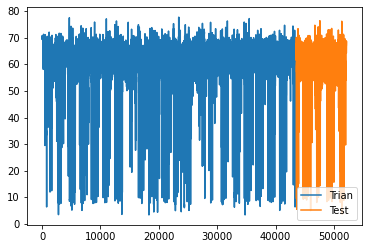

In [ ]:
train, = plt.plot(train_data)
test, = plt.plot(test_data)
plt.legend([train, test], ['Trian', 'Test'])

In [ ]:
model = auto_arima(train_data, seasonal=True,
                      start_p=2, start_q=2, max_order=7, 
                      test='adf',error_action='ignore',  
                      suppress_warnings=True,
                      stepwise=True, trace=True)

preds = model.predict(len(test_data))
print(f"MAE: {mean_absolute_error(test_data.values, preds)}")

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=192561.427, Time=24.04 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=337761.005, Time=1.08 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=198429.814, Time=2.45 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=286775.835, Time=11.96 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=479902.056, Time=0.47 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=193004.585, Time=20.90 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=192569.267, Time=16.53 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=192559.085, Time=67.70 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=192562.657, Time=34.77 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=192566.354, Time=70.47 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=192561.013, Time=22.00 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=192558.907, Time=28.86 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=192658.530, Time=25.64 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=192561.172, Time=18.1

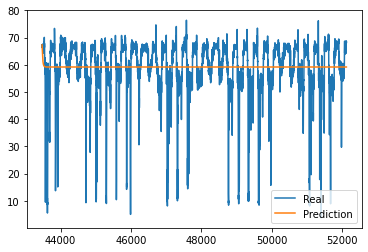

In [ ]:
true, = plt.plot(test_data)
pred, = plt.plot(preds)
plt.legend([true, pred], ['Real', 'Prediction'])